<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week2_LectureSlide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM5222
# Week 2

## Agenda

* Heavy Tails
* Exponential Tails
* Polynomial Tails
* Mixture Models
* Constructing distributions with skew and/or kurtosis
* Quantile based approaches to fitting

## Heavy Tails

We have previously referred to "heavy" tails without formally defining what this means.  In truth, the usage is often loose in that the term is used two common ways.  In fact, even the term "tail" is generally not formally defined, though people understand it to mean the behavior "far from the center.

### What is the tail?

If we have a desire to be formal, we can define the tail of random variable $X$ to be the region where 
$|x| > \mu_X + c \sigma_X$ for some constant $c$. Typically we might think of $c$ as being 1, 1.96, 3, etc.

Alternatively, since the moments are not always guaranteed to exist, we could define the tail to be 

$x < X_{q_1}$ OR $x > X_{q_2}$ where $q_1 < \frac{1}{2} < q_2$.

For example, we could take $q_1 = .25$ and $q_2 = .75$ meaning that the "tail" is the stuff outside the IQR.  

In the end, understanding the tails will come down to the behavior of $f_X(x)$ as $|x| \to \infty$ 

Of course, for strictly positive distributions like lognormal, we would use only a one-sided definition.



### Heavy Tails

One way to understand the heavyness of a tail is to look at the moments.  Recall that

$$M_n(X) = \mathrm{E}[X^n] = \int_{-\infty}^{\infty} x^nf_X(x) dx$$


As $n$ gets larger, the moments will become increasingly sensitive to the PDF for large values of $x$. Hence, the moments are a good way to measure the behavior in the tail.

This motivates our two common "definitions" of heavy tailed.

1. A random variable is "heavy tailed" if its kurtosis is larger than 3 (that is, its excess kurtosis is positive).  This just means that its tails carry more weight than the normal distribution. That is to say, the normal distribution is the measuring stick.



2. A random variable is "heavy tailed" if the moments $M_n(X)$ are undefined for large enough $n$.   


They are not equivalent.  And while I will use them somewhat loosely, be aware that some authors will strictly adhere to one of these definitions. 










#### Comment

As quick reminder, recall how the function $x^n$ behaves as $n$ gets larger via a few plots.

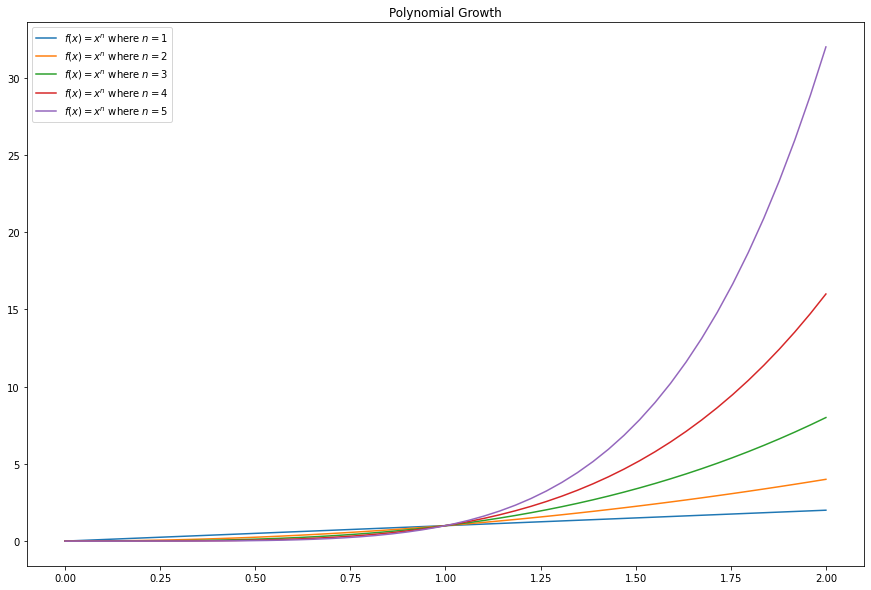

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
ns = np.array([1,2,3,4,5])

x = np.linspace(0,2)

for n in ns:
    plt.plot(x, x**n, label = "$f(x) = x^n$ where $n =$"+str(n))

plt.legend()

plt.title("Polynomial Growth")
plt.show()


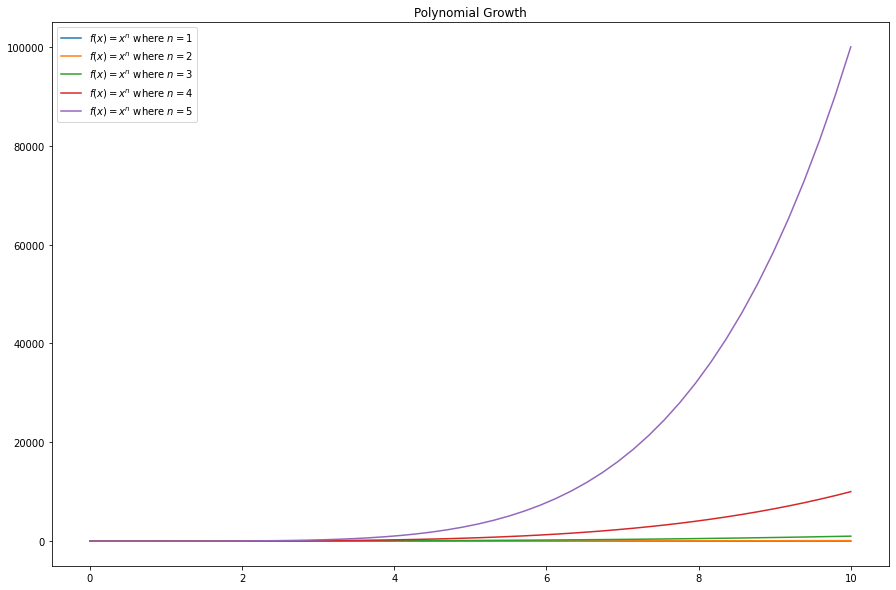

In [ ]:
plt.figure(figsize = (15,10))
ns = np.array([1,2,3,4,5])

x = np.linspace(0,10)

for n in ns:
    plt.plot(x, x**n, label = "$f(x) = x^n$ where $n =$"+str(n))

plt.legend()

plt.title("Polynomial Growth")

plt.show()

## Exponential Tails

We define a PDF to have exponential tails if for $x$ sufficiently large,

$f_X(x) \propto e^{-\left|\frac{x}{\lambda}\right|^{\nu}}$  

for some $\nu >0$ and some scale paramter $\lambda$


This will imply that $M_n(X)$ is finite for any $n$ no matter how large.  That is, all moments will be defined.

That is because exponential drop-off in the PDF will "crush" the growth of the polynonial $x^n$ no matter how large $n$ is. 

We can also see that  $\nu = 2$ corresponds to the Gaussian (normal) distribution.  


Addtionally, $\nu = 1$ corresponds to the two-sided exponential distribution (this is just the exponential distribution mirrored over $y-axis$ so as to have support on the entire real line).  Note that this distribution is also called the *Laplace distribution*.




This motivates the definition of a family of distributions indexed by $\nu$ that are symmetric, with a mean of zero and variance of one.

## Generalized Error Distribution (GED)


The form of the ged is given by

$f_X(x) = \kappa(\nu) e^{-\left|\frac{x}{\lambda_{\nu}}\right|^{\nu}}$

The terms $\kappa(\nu)$ and $\lambda_{\nu}$ are constants that depend on $\nu$. They are simply set so that the variance is one and the PDF integrates to 1.


We won't prove this, but it can be shown that the choice of $\lambda_{\nu}$ and $\kappa(\nu)$ that will do the trick are:

$$\lambda_{\nu} = \sqrt{\frac{2^{\frac{-2}{\nu}}\Gamma(\nu^{-1})}{\Gamma\left(\frac{3}{\nu}\right)}}$$


and

$$\kappa(\nu) = \frac{\nu}{\lambda_{\nu}2^{\frac{\nu+1}{\nu}}\Gamma(\nu^{-1})}$$

### Generalized normal distribution

This family is often called the generlized normal distribution. And oftern the variance is not normalized to 1.

In scipy.stats, the default $\lambda$ parameter is itself 1.  This somewhat simplifies the PDF to

$$f_X(x) =  \frac{\nu}{2\Gamma(\nu^{-1})}e^{-|x|^{\nu}}$$

But scale paramter must be used along with the variance of this version in order to set the variance to what we want.


Let's do an example.  Note that scipy.stats uses "beta" as the shape parameter (our $\nu$)


We will plot the GED for various choices of $\nu$.  We will then examine how their higher moments differ.

In [ ]:
import scipy.stats as ss


In [ ]:
help(ss.gennorm)

Help on gennorm_gen in module scipy.stats._continuous_distns object:

class gennorm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  gennorm_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A generalized normal continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `gennorm` is [1]_:
 |  
 |  .. math::
 |  
 |      f(x, \beta) = \frac{\beta}{2 \Gamma(1/\beta)} \exp(-|x|^\beta)
 |  
 |  :math:`\Gamma` is the gamma function (`scipy.special.gamma`).
 |  
 |  `gennorm` takes ``beta`` as a shape parameter for :math:`\beta`.
 |  For :math:`\beta = 1`, it is identical to a Laplace distribution.
 |  For :math:`\beta = 2`, it is identical to a normal distribution
 |  (with ``scale=1/sqrt(2)``).
 |  
 |  See Also
 |  --------
 |  laplace : Laplace distribution
 |  norm : normal distribution
 |  
 |  References
 |  ----------
 |  
 |  .. [1] "

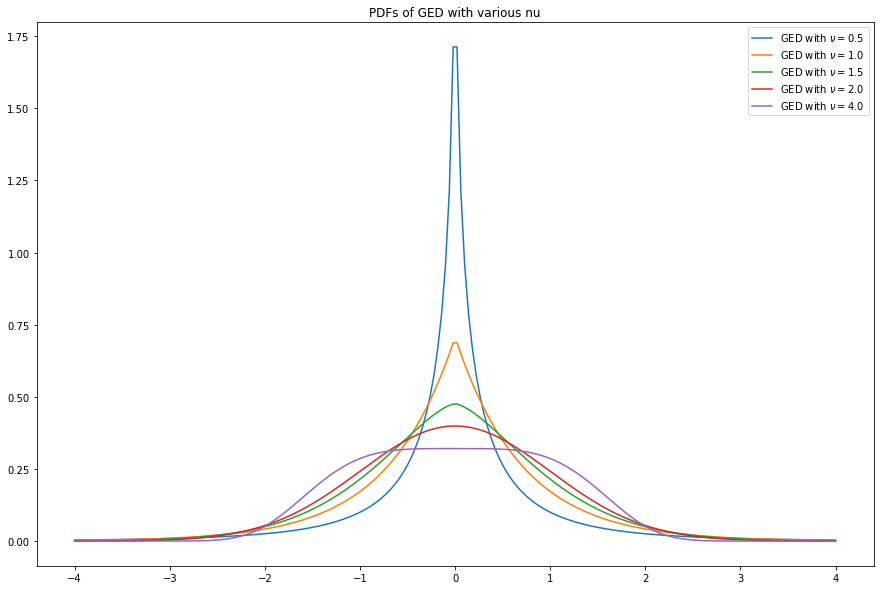

In [ ]:
x = np.linspace(-4,4,200)

plt.figure(figsize = (15,10))




for nu in np.array([.5,1,1.5, 2,4]):
    
    scale = np.sqrt(1/ss.gennorm.var(beta = nu))  # forcing the variance to be 1
    
    plt.plot(x, ss.gennorm.pdf(x,beta = nu, scale = scale), label ="GED with $\\nu = $"+str(nu))
    
plt.legend()

plt.title("PDFs of GED with various nu")

plt.show()

In [ ]:
for nu in np.array([.5,1,1.5, 2,4]):
    
    scale = np.sqrt(1/ss.gennorm.var(beta = nu))  # forcing the variance to be 1
    
    print("For nu = "+str(nu)+", the excess kurtosis is ",ss.gennorm.stats(beta = nu, scale = scale, moments='k'))

For nu = 0.5, the excess kurtosis is  22.199999999999996
For nu = 1.0, the excess kurtosis is  3.000000000000001
For nu = 1.5, the excess kurtosis is  0.7619542369302295
For nu = 2.0, the excess kurtosis is  -4.440892098500626e-16
For nu = 4.0, the excess kurtosis is  -0.8115603847735233


You may have already noted that the high kurtosis PDFs are more peaked in the middle, but let's look farther out:

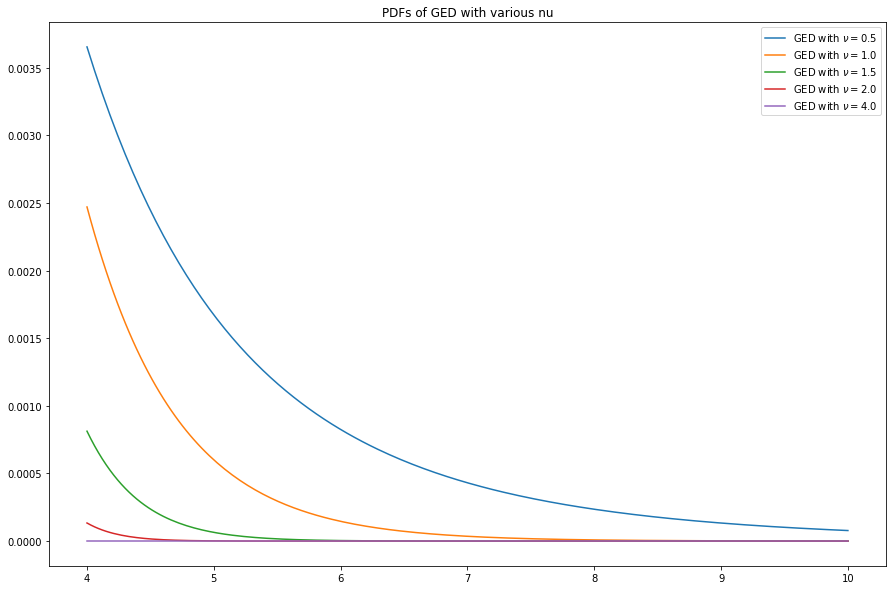

In [ ]:
x = np.linspace(4,10,200)

plt.figure(figsize = (15,10))

for nu in np.array([.5,1,1.5, 2,4]):
    
    scale = np.sqrt(1/ss.gennorm.var(beta = nu))  # forcing the variance to be 1
    
    plt.plot(x, ss.gennorm.pdf(x,beta = nu, scale = scale), label ="GED with $\\nu = $"+str(nu))
    
plt.legend()

plt.title("PDFs of GED with various nu")

plt.show()

## Polynomial Tails

A PDF is said to have a polynomial tail with index $\alpha$ if for large $|x|$, we have

$$f_X(x) \propto \frac{1}{|x|^{\alpha + 1}}$$

An example of this we have already seen is the T distribution since for that

$$f_X(x) = \frac{\Gamma\left(\frac{\nu +1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(   1+ \frac{x^2}{\nu}\right)^{-\frac{\nu +1}{2}}$$


For large values of $|x|$, only the large polynomial terms in the denominator matter and the index is $\alpha  = \nu$

Suppose we want to calculate the moments of the PDF.  In the tails, we are going to evaluate (up to a constant)

$$\int_{-\infty}^{\infty}  |x|^n \frac{1}{|x|^{\alpha + 1}} dx =\int_{-\infty}^{\infty}  \frac{1}{|x|^{\alpha + 1 -n}} dx $$


If $\alpha >n $, the anti-derivative is $\frac{1}{|x|^{\alpha - n}}$ and this integrates nicely.

But if $\alpha \leq n$, the integral diverges and the moment will not exist.

Hence, polynomial tailed distributions are *always* heavey tailed in the sense of our second definition.

In particular, the t-distribution is always heavey tailed.  







## Mixture Distributions

We have seen two types of tails that generate heavy tails (depending on our defintion):  Exponential and Polynomial.

Another way to generate kurtosis is through a mixture distribution.  

Let's motivate this with some examples.

Consider an experiment where a coin is fipped and the probability of a heads is $p$.  If the coin lands heads, a number is drawn from distribution 1 which is normal distribution with $\mu_1 = -\xi$ and $\sigma_1^2 = 1$.   However, if the coin is "tails", the number drawn will be from distribution 2 with mean $\mu_2 = \frac{p}{1-p}\xi$ and variance $\sigma_2^2 =1$.  We assume $\xi >0$

Let's determine the PDF, and calculate the moments for various choices of $\xi$ and $p$.


####  PDF

The PDF will be given by

$$f_X(x) = p f_1(x) + (1-p) f_2(x)$$

We can see this because

$$F_X(x) = \mathrm{Pr}(X \leq x) \\
= \mathrm{Pr}(H) \mathrm{Pr}(X \leq x |H) +  \mathrm{Pr}(T) \mathrm{Pr}(X \leq x |T)\\
=p F_1(X) + (1-p) F_2(X)$$


It therefore easy to calculate the various moments:

$$M_n(X) = \int_{-\infty}^{\infty} x^n f_X(x) dx \\
= \int_{-\infty}^{\infty} x^n (p f_1(x) + (1-p) f_2(x)) dx\\
pM_n(X_1) + (1-p)M_n(X_2)$$


But we know that $f_1(x) = \phi(x-mu_1)$ and $f_2(x) = \phi(x-\mu_2)$, so we have

$M_1(X) = p\mu_1 + (1-p)\mu_2 = p(-\xi) + (1-p)\frac{p}{1-p}\xi = 0  $ 

$M_2(X) = p(1 + \mu_1^2  )   + (1-p) (1 +  \mu_2^2  ) >1$

$M_3(X) = p(3\mu_1 + \mu_1^3) + (1-p)( 3\mu_2 + \mu_2^3)$

$M_4(X) = p(3 + 6\mu_1^2 + \mu_1^4) + (1-p)(3 +  6\mu_2^2 + \mu_2^4)$

(this is an exercize, why are these true?)






What about skew and kurtosis?  We recall that 

$$\mathrm{Skew}(X) = \frac{1}{\sigma_X^3}\left(M_3(X) - 3\sigma_X^2\mu_X - \mu_X^3\right)\\
  $$
  
and

$$\mathrm{Kurt}(X)= \frac{1}{\sigma_X^4}\left( M_4(X) - 4M_3(X)\mu_X + 6\sigma_X^2\mu_X^2 + 3\mu_X^4\right)$$

So we calculate with some choices 

In [ ]:
xi = 1
p = .6
mu1 = -xi
mu2 = p/(1-p)* xi

M1 = p*mu1 + (1-p)* mu2

M2 = p*(1+ mu1**2) + (1-p) *(1+ mu2**2)

M3 = p*(3*mu1 + mu1**3)   + (1-p) *(3*mu2 + mu2**3)

M4 = p*(3 + 6*mu1**2 + mu1**4)   + (1-p) *(3 + 6*mu2**2 + mu2**4)


var = M2 - M1**2

print("The Variance is ", var)

skew = (M3 - 3*var*M1 - M1**3)/var**(3/2)

print("The skew is ", skew)

kurt = (M4 - 3*M3*M1 + 6*var*M1**2 + 3*M1**4)/var**2

print("The excess kurtosis is ", kurt - 3)

The Variance is  2.5
The skew is  0.18973665961010266
The excess kurtosis is  -0.6600000000000001


Now for the PDF.  We will compare it with a normal PDF centered at zero but with the same variance.



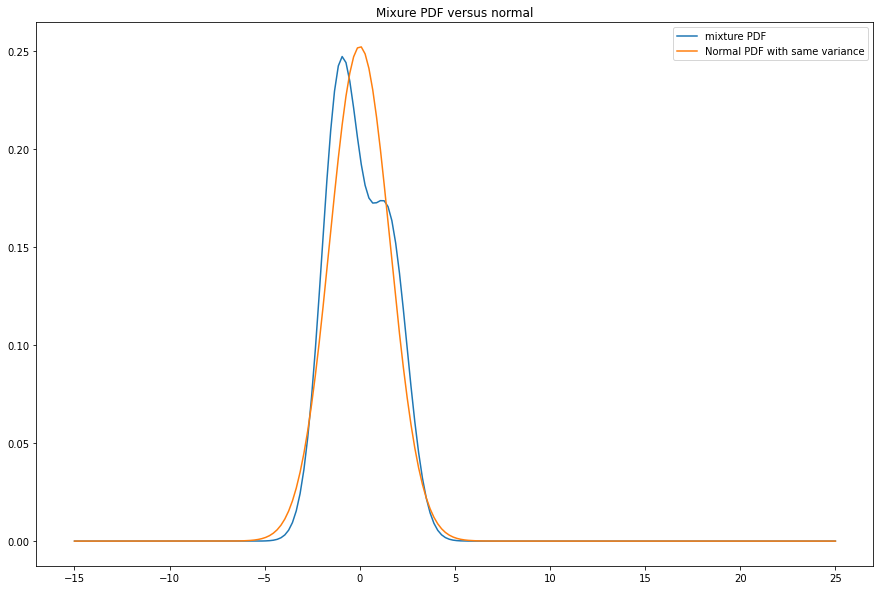

In [ ]:
f = lambda x: p*ss.norm.pdf(x-mu1) + (1-p)*ss.norm.pdf(x-mu2)


x = np.linspace(-15,25,200)

plt.figure(figsize = (15,10))

plt.plot(x, f(x), label ="mixture PDF")

plt.plot(x, ss.norm.pdf(x, scale = np.sqrt(var)), label ="Normal PDF with same variance")

plt.legend()

plt.title("Mixure PDF versus normal")

plt.show()



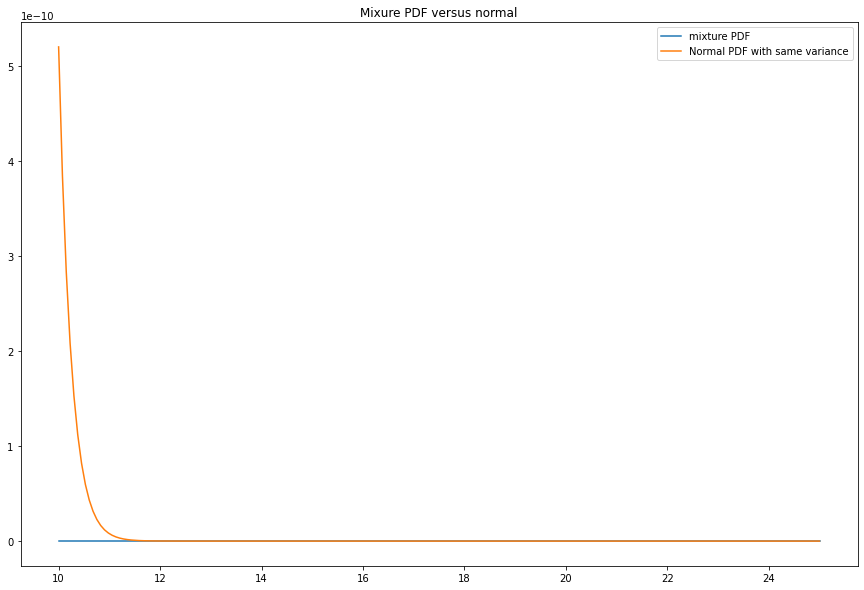

In [ ]:
f = lambda x: p*ss.norm.pdf(x-mu1) + (1-p)*ss.norm.pdf(x-mu2)


x = np.linspace(10,25,200)

plt.figure(figsize = (15,10))

plt.plot(x, f(x), label ="mixture PDF")

plt.plot(x, ss.norm.pdf(x, scale = np.sqrt(var)), label ="Normal PDF with same variance")

plt.legend()

plt.title("Mixure PDF versus normal")

plt.show()


Now, let's just check that all algebra is correct by numerically integrating things.

In [ ]:
from scipy.integrate import quad

In [ ]:
print(quad(lambda x: f(x),-np.inf, np.inf)[0], "Yes, integrates to 1")

print(quad(lambda x: x*f(x),-np.inf, np.inf)[0], "Yes, mean of 0")

print(quad(lambda x: x**2*f(x),-np.inf, np.inf)[0], var, "Variance check")


print(quad(lambda x: x**3*f(x),-np.inf, np.inf)[0], M3, "Third moment check")


print(quad(lambda x: x**4*f(x),-np.inf, np.inf)[0], M4, "Fouth moment check")

print(quad(lambda x: (x/np.sqrt(var))**3*f(x),-np.inf, np.inf)[0], skew, "Skew check")

print(quad(lambda x: (x/np.sqrt(var))**4*f(x),-np.inf, np.inf)[0], kurt, "Kurtosis check")

1.0 Yes, integrates to 1
3.469446951953614e-17 Yes, mean of 0
2.5000000000000004 2.5 Variance check
0.7499999999999996 0.7499999999999996 Third moment check
14.625 14.624999999999998 Fouth moment check
0.18973665961010255 0.18973665961010266 Skew check
2.3399999999999994 2.34 Kurtosis check


Now let's spread things further apart an observe.

The Variance is  17.000000000000004
The skew is  1.3696129413816451
The excess kurtosis is  0.22145328719723212


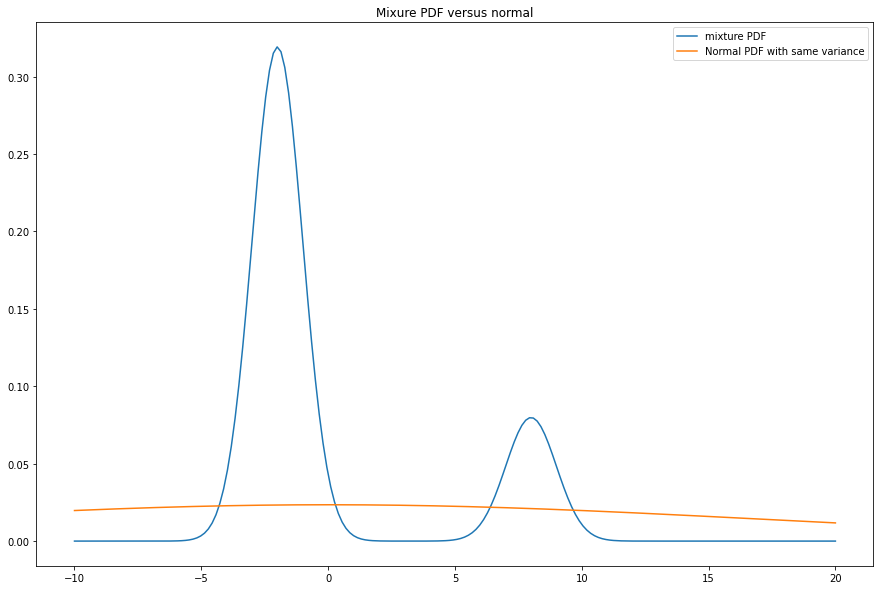

In [ ]:
xi = 2
p = .8
mu1 = -xi
mu2 = p/(1-p)* xi

M1 = p*mu1 + (1-p)* mu2

M2 = p*(1+ mu1**2) + (1-p) *(1+ mu2**2)

M3 = p*(3*mu1 + mu1**3)   + (1-p) *(3*mu2 + mu2**3)

M4 = p*(3 + 6*mu1**2 + mu1**4)   + (1-p) *(3 + 6*mu2**2 + mu2**4)


var = M2 - M1**2

print("The Variance is ", var)

skew = (M3 - 3*var*M1 - M1**3)/var**(3/2)

print("The skew is ", skew)

kurt = (M4 - 3*M3*M1 + 6*var*M1**2 + 3*M1**4)/var**2

print("The excess kurtosis is ", kurt - 3)


f = lambda x: p*ss.norm.pdf(x-mu1) + (1-p)*ss.norm.pdf(x-mu2)


x = np.linspace(-10,20,200)

plt.figure(figsize = (15,10))

plt.plot(x, f(x), label ="mixture PDF")

plt.plot(x, ss.norm.pdf(x, scale = var), label ="Normal PDF with same variance")

plt.legend()

plt.title("Mixure PDF versus normal")

plt.show()

The Variance is  5.0
The skew is  0.0
The excess kurtosis is  -1.28


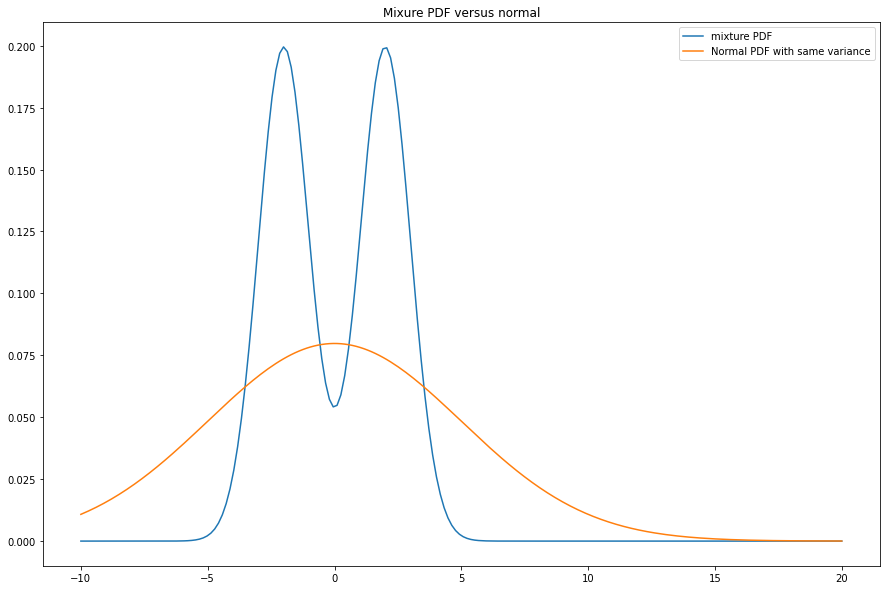

In [ ]:
xi = 2
p = .5
mu1 = -xi
mu2 = p/(1-p)* xi

M1 = p*mu1 + (1-p)* mu2

M2 = p*(1+ mu1**2) + (1-p) *(1+ mu2**2)

M3 = p*(3*mu1 + mu1**3)   + (1-p) *(3*mu2 + mu2**3)

M4 = p*(3 + 6*mu1**2 + mu1**4)   + (1-p) *(3 + 6*mu2**2 + mu2**4)


var = M2 - M1**2

print("The Variance is ", var)

skew = (M3 - 3*var*M1 - M1**3)/var**(3/2)

print("The skew is ", skew)

kurt = (M4 - 3*M3*M1 + 6*var*M1**2 + 3*M1**4)/var**2

print("The excess kurtosis is ", kurt - 3)


f = lambda x: p*ss.norm.pdf(x-mu1) + (1-p)*ss.norm.pdf(x-mu2)


x = np.linspace(-10,20,200)

plt.figure(figsize = (15,10))

plt.plot(x, f(x), label ="mixture PDF")

plt.plot(x, ss.norm.pdf(x, scale = var), label ="Normal PDF with same variance")

plt.legend()

plt.title("Mixure PDF versus normal")

plt.show()

### Discrete mixtures

More generally, suppose we have a discrete random variable $K$ that can take on values $K = {1,2,...,N}$ with probabilties $p_1,p_2, ..., p_N$. And we also have $N$ contious PDF's f_i(X).  We can then define the mixure density via

$$f_X(x) = \sum_{k=1}^N p_k f_k(X)$$

Such distributions can allow for a rather rich set of behaviors in terms of moments. 

### Continuous mixtures

The experiment with a discrete mixture is two stepped, first one draws to determine *which* continous distribution to draw from. Then one draws from it.   But it's not hard to generalize the concept to the first step itself being drawn from a continous distribution which then in term indexes continous family of distributions $f_X(x;u)$

We might denote the first distribution as $U$ with PDF $g_U(u)$ and the mixture PDF would then be:

$$f_X(x) = \int g_U(u) f_X(x;u) du$$


We would say that $f_X(x)$ is the unconditional PDF for $X$ (we don't know $u$) and $f_X(x;u)$ is the conditional PDF for $X$ (we know $u$).


#### Example

Let $U$ be uniform on $(1,3)$ and $u$ represent the index of the GED. Plot the PDF.  Using numerical integration, determine the variance, skew, and kurtosis. 


**Solution**

$f_X(x;u)$ can be obtained using scipy.stats gennorm but we need to scale it properly so the mean is one.  We define it with a lambda function. 

In [ ]:
f_cond = lambda x,u: ss.gennorm.pdf(x,beta =u, scale = 1/np.sqrt(ss.gennorm.var(beta =u)))

g = lambda u: ss.uniform.pdf(u, loc=1, scale =2 ) 


f_unc = lambda x:  quad(lambda u: g(u)*f_cond(x,u), 1, 3)[0]

f_un = np.vectorize(f_unc)


Plotting this:

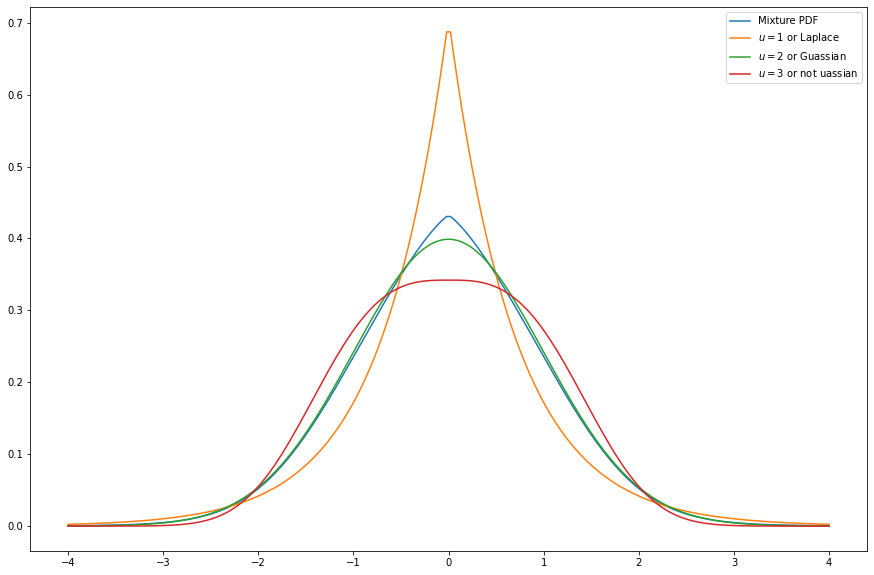

In [ ]:
x = np.linspace(-4,4,200)

plt.figure(figsize = (15,10))



plt.plot(x, f_un(x),label = "Mixture PDF" )


plt.plot(x, f_cond(x, 1),label = "$u=1$ or Laplace" )

plt.plot(x, f_cond(x, 2),label = "$u=2$ or Guassian" )

plt.plot(x, f_cond(x, 3),label = "$u=3$ or not uassian" )

plt.legend()

plt.show()

We then calculate the other statistics


In [ ]:
 quad(f_un, -np.inf, np.inf)[0]  # Checking that it does indeed integrate to 1.

1.0000000000089049

In [ ]:
 quad(lambda x: x*f_un(x), -np.inf, np.inf)[0]  # The mean should be zero since all the mixture pdfs have mean 0

0.0

In [ ]:
 quad(lambda x: x**2*f_un(x), -np.inf, np.inf)[0] # This should be one. Good.

0.9999999999999121

In [ ]:
np.sqrt(2)**2 - 2

4.440892098500626e-16

In [ ]:
 quad(lambda x: x**3*f_un(x), -np.inf, np.inf)[0] # This should be zero. Good.

0.0

In [ ]:
 quad(lambda x: x**4*f_un(x), -np.inf, np.inf)[0] # 

3.3205355146531352

We see that this has more kurtosis than the normal distribution.

## Creating distributions with Skew

We have seen some general ways construct PDFs that will have kurtosis, and this can be important in finance since many of the emprical distributions show heavy tails.   But it also important to have skew - something that is seen in the data.  How can we do this?  

The text describes two methods. Of courses, these are not the only options.

### Fernandez-Steel

Let $g$ be the PDF any symmetric distribution.  We define a family of PDFs indexed by $\xi$ via

$f_X(x;\xi) = \begin{cases}c(\xi)g(\xi x), & x\geq 0 \\ c(\xi)g\left(\frac{x}{\xi}\right), & x <0 \\ \end{cases}$

where

$c(\xi) = \frac{2}{\xi + \xi^{-1}}$

This dislocates the left behavior from the right and will should therefore generate skew.  

#### Example

Let $g$ be the PDF of the T distribution is $\nu = 5$.  Set $\xi = 1.5$

Plot the F-S PDF and calculate its mean, variance, and skew.

In [ ]:
xi = 1.5
def f(x,xi):
    c = 2/(xi + 1/xi)
    f = c*(ss.t.pdf(x*xi, df = 5)*(x>=0) + ss.t.pdf(x/xi, df = 5)*(x<0))
    return f

fs = np.vectorize(lambda x: f(x,1.5))



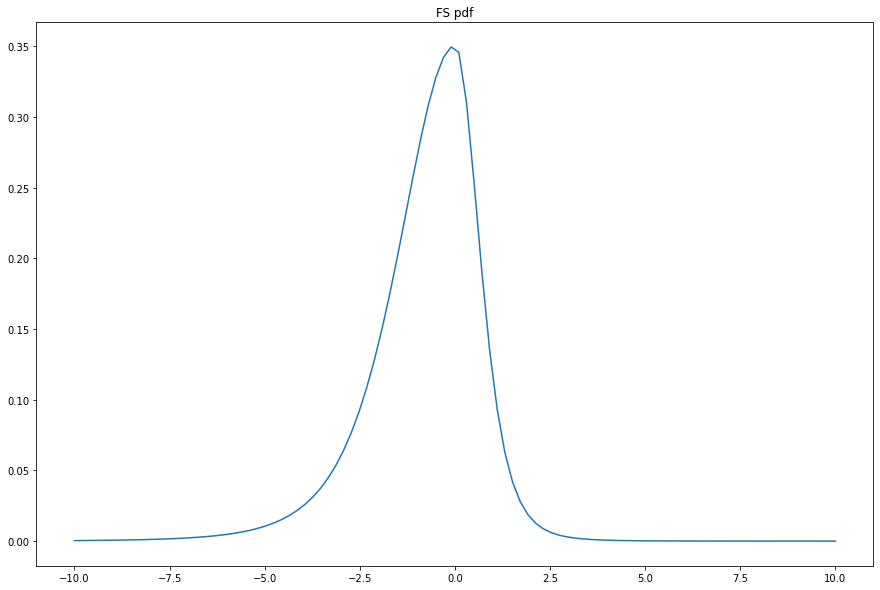

In [ ]:
x = np.linspace(-10,10,100)

plt.figure(figsize = (15,10))

plt.plot(x, fs(x))

plt.title("FS pdf")

plt.show()

In [ ]:
 quad(fs, -np.inf, np.inf)[0]  # Checking that it does indeed integrate to 1

1.0

In [ ]:
mu = quad(lambda x: x*fs(x), -np.inf, np.inf)[0]
var =  quad(lambda x: (x-mu)**2*fs(x), -np.inf, np.inf)[0]
sigma = np.sqrt(var)

skew =  quad(lambda x: ((x-mu)/sigma)**3*fs(x), -np.inf, np.inf)[0]

print("the Mean is ", mu)
print("the Variance is " ,var)
print("the skew is ", skew)




the Mean is  -0.7908472704635301
the Variance is  2.1986346688744582
the skew is  -1.5163661860441326


Notice that the transformed function has a mean different from zero and variance differnt from one. One can of course centralize this with a shift and scale.  But this will not effect the skew.

### Azzalini and Capatanio

Another approach again starts with a symmetric distribution with PDF $f(x)$ and CDF $F(X)$.  We can then define a new PDF   

$g(x;a) = 2f(x) F(ax)$

It's not obvious that this in in fact a PDF, though the special cases of $a=0$ and $a = 1$ are relatively clear (the latter because $F(x)^2$ is also a CDF).

But if we differentiate the expression $\int_{-\infty}^{\infty} 2f(x) F(ax) dx$ with respect to $a$ we can become convinced.

The key point is that this creates a family of distribtions with varying skew. 

If the density $f$ is replaced by a family of densities (like student T), one can then creat a larger family that exhibits skew and kurtosis (and can always be shifted and scaled as desired).  This provides a means to create distributions intended to match skew and kurtosis.  

Note however that the relationship of the parameters to skew and kurtosis is non-intuitive.  And one typically would numerically target the parameter choices.


#### Example

Plot the PDF under thte A-C approach where the initial distribution is Student $T$ with $\nu = 5$.  Take $a = 3$


In [ ]:
nu = 5
a = 3

f =  lambda x: 2* ss.t.pdf(x, df = nu) * ss.t.cdf(a*x, df = nu)

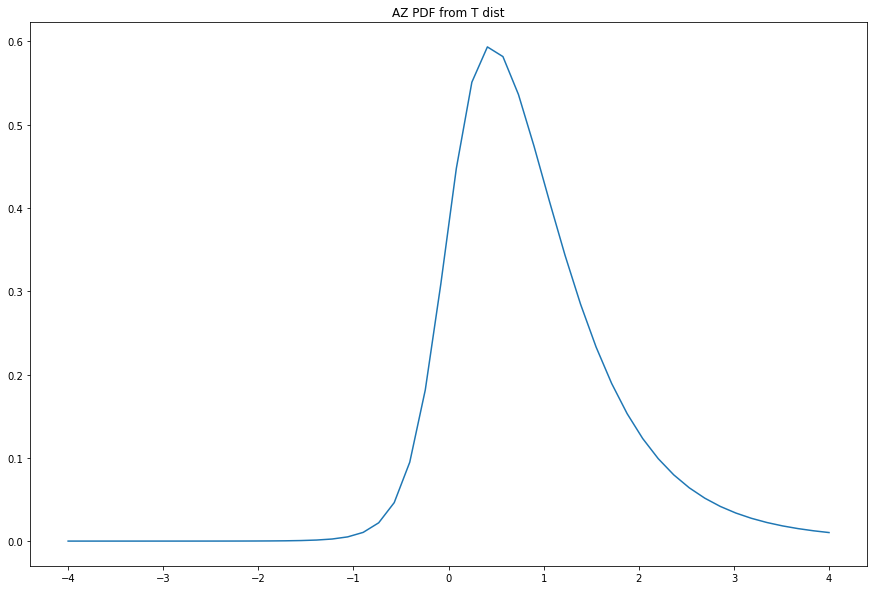

In [ ]:
x = np.linspace(-4,4)

plt.figure(figsize = (15,10))
plt.plot(x, f(x))

plt.title("AZ PDF from T dist")

plt.show()

In [ ]:
quad(f,-np.inf, np.inf)[0]  # should be 1.

1.0

In [ ]:
mu = quad(lambda x: x*f(x),-np.inf, np.inf)[0]

print("the mean is ", mu)
sigma =  np.sqrt(quad(lambda x: (x- mu)**2*f(x),-np.inf, np.inf)[0])

print("the standard deviation is ", sigma)

skew = quad(lambda x: ((x- mu)/sigma)**3*f(x),-np.inf, np.inf)[0]

print("The Skew is ", skew)

kurt = quad(lambda x: ((x- mu)/sigma)**4*f(x),-np.inf, np.inf)[0]

print("The excess kurtosis is ", kurt -3)


the mean is  0.8934102758517692
the standard deviation is  0.9319252897465182
The Skew is  2.08275499742594
The excess kurtosis is  15.799142474654957


## Quantile ways to think about location, scale, skewnesss, and "heavy tailed"

We have defined the above terms in terms of moments. Location corresponding to the first moment, scale to the second, skew to the third, and heavy tailed the fouth.

Another approach is to think not in terms of moments, but quantiles.  Then we can think of them as follows:

1. A Location parameter is just a single quantile like median.  Or it can be an average of quantiles.

2. Scale parameter is the difference of two quantiles like the IQR. (and this can obviously be made more exotic as well)

3. A Skewness parameter can be thought of as a ratio of the difference between 2 scale parameters with another scale parameter.

4. A Heavynesss parameter can be thought of the ratio of two scale parameters.

## Exercise in class

Construct some examples illustrating the quantile approach.  For example, use the normal distribution as the benchmark and compare with other distributions with skew or kurtosis.